# Determining Absorbance of GA017 in VP35 labeling buffer

This data shows that at 1:1000 dilution, GA017 strongly absorbs in the 350 - 450 nm range

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

GA017_scan = pd.read_csv("2018Nov14-vp35labelingbufferonly.csv", delimiter = ',')
GA017_scan = GA017_scan.rename(index=str, columns={"Buffer": "Buffer Wavelength", "Unnamed: 1": "Buffer ABS", "GA017":"GA017 Wavelength", "Unnamed: 3": "GA017 ABS"})
GA017_scan = GA017_scan.drop(['Unnamed: 4'], axis = 1)
GA017_scan = GA017_scan[1:-56]
for header in GA017_scan.columns:
    GA017_scan[header] = GA017_scan[header].astype('float64')
labels = ['Wavelength (nm)', 'Absorbance (AU)']
abs_data = GA017_scan.loc['1':,"GA017 ABS"] - GA017_scan.loc['1':,"Buffer ABS"]
#plt.figure(figsize = (10,10))
plt.plot(GA017_scan.loc['1':,"Buffer Wavelength"], abs_data)
plt.ylabel(labels[1])
plt.xlabel(labels[0])
plt.show()

<Figure size 640x480 with 1 Axes>

### The scan below was done at a 1:100 dilution of GA017 in the presence of all assay compenents, at the assay concentration

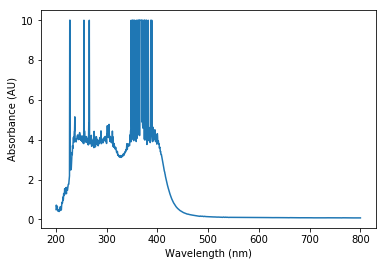

In [2]:
GA017_assay_scan = pd.read_csv("2018Nov14-vp35-GA017.csv", nrows = 1200, usecols = [0,1], skiprows = 1, delimiter = ',', dtype = np.float64)
plt.plot(GA017_assay_scan.loc[:,'Wavelength (nm)'], GA017_assay_scan.loc[:,'Abs'])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance (AU)")
plt.show()

# The RNA binding capacity of WT-VP35 in the presence and absence of GA017 as measured at 450 nm

<function matplotlib.pyplot.show(*args, **kw)>

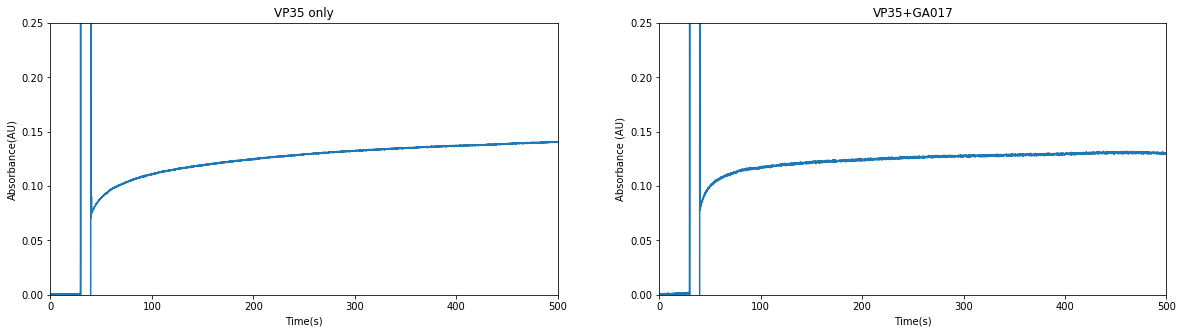

In [3]:
protein_only = pd.read_csv("2018Nov14-vp35-polyic.csv", delimiter=',', nrows = 9817, usecols = [0,1], skiprows = 1, header=0, dtype = np.float64)
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.plot(protein_only.loc[:,'Time (sec)'], protein_only.loc[:,'Abs'])
plt.xlim((0,500))
plt.ylim((0,0.25))
plt.xlabel("Time(s)")
plt.ylabel('Absorbance(AU)')
plt.title("VP35 only")
with_GA017 = pd.read_csv("2018Nov14-vp35-ga017-polyic.csv", delimiter = ',', nrows = 5188, usecols=[0,1], skiprows =1, header = 0, dtype = np.float64)
plt.subplot(122)
plt.plot(with_GA017.loc[:,'Time (sec)'], with_GA017.loc[:, 'Abs'])
plt.ylabel("Absorbance (AU)")
plt.xlabel("Time(s)")
plt.title ("VP35+GA017")
plt.xlim((0,500))
plt.ylim((0,0.25))
plt.show

### The plot shown below overlays the with and without GA017 RNA binding by VP35 traces   

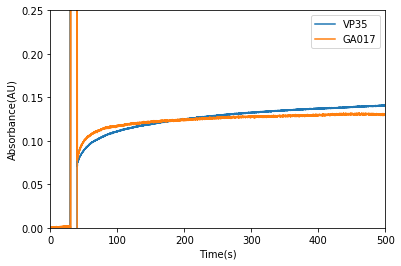

In [4]:
plt.plot(protein_only.loc[:,'Time (sec)'], protein_only.loc[:,'Abs'], label = 'VP35')
plt.plot(with_GA017.loc[:,'Time (sec)'], with_GA017.loc[:,'Abs'], label = "GA017")
plt.xlim((0,500))
plt.ylim((0,0.25))
plt.xlabel("Time(s)")
plt.ylabel("Absorbance(AU)")
plt.legend()